In [2]:
import pandas, seaborn
from glob import glob
import matplotlib as mpl

In [3]:
def get_data(glob_pattern):
    fnames = glob(glob_pattern)

    df = None
    for fname in fnames:
        id_query,endpoint = fname.split(".")[:2]
        id, query = id_query.split("-")
        timings_data = pandas.read_csv(fname, sep=',', header=0)
        
        timings_data = timings_data.melt(var_name='clock', value_name='time (s)')
    
        timings_data['query'] = query.replace("_", " ")
        timings_data['endpoint'] = endpoint

        if df is None:
            df = timings_data
        else:
            df = pandas.concat([df, timings_data])
    return df

In [4]:
data = get_data("saved_runs/20241212T164000/??-*.timings.collected.csv")

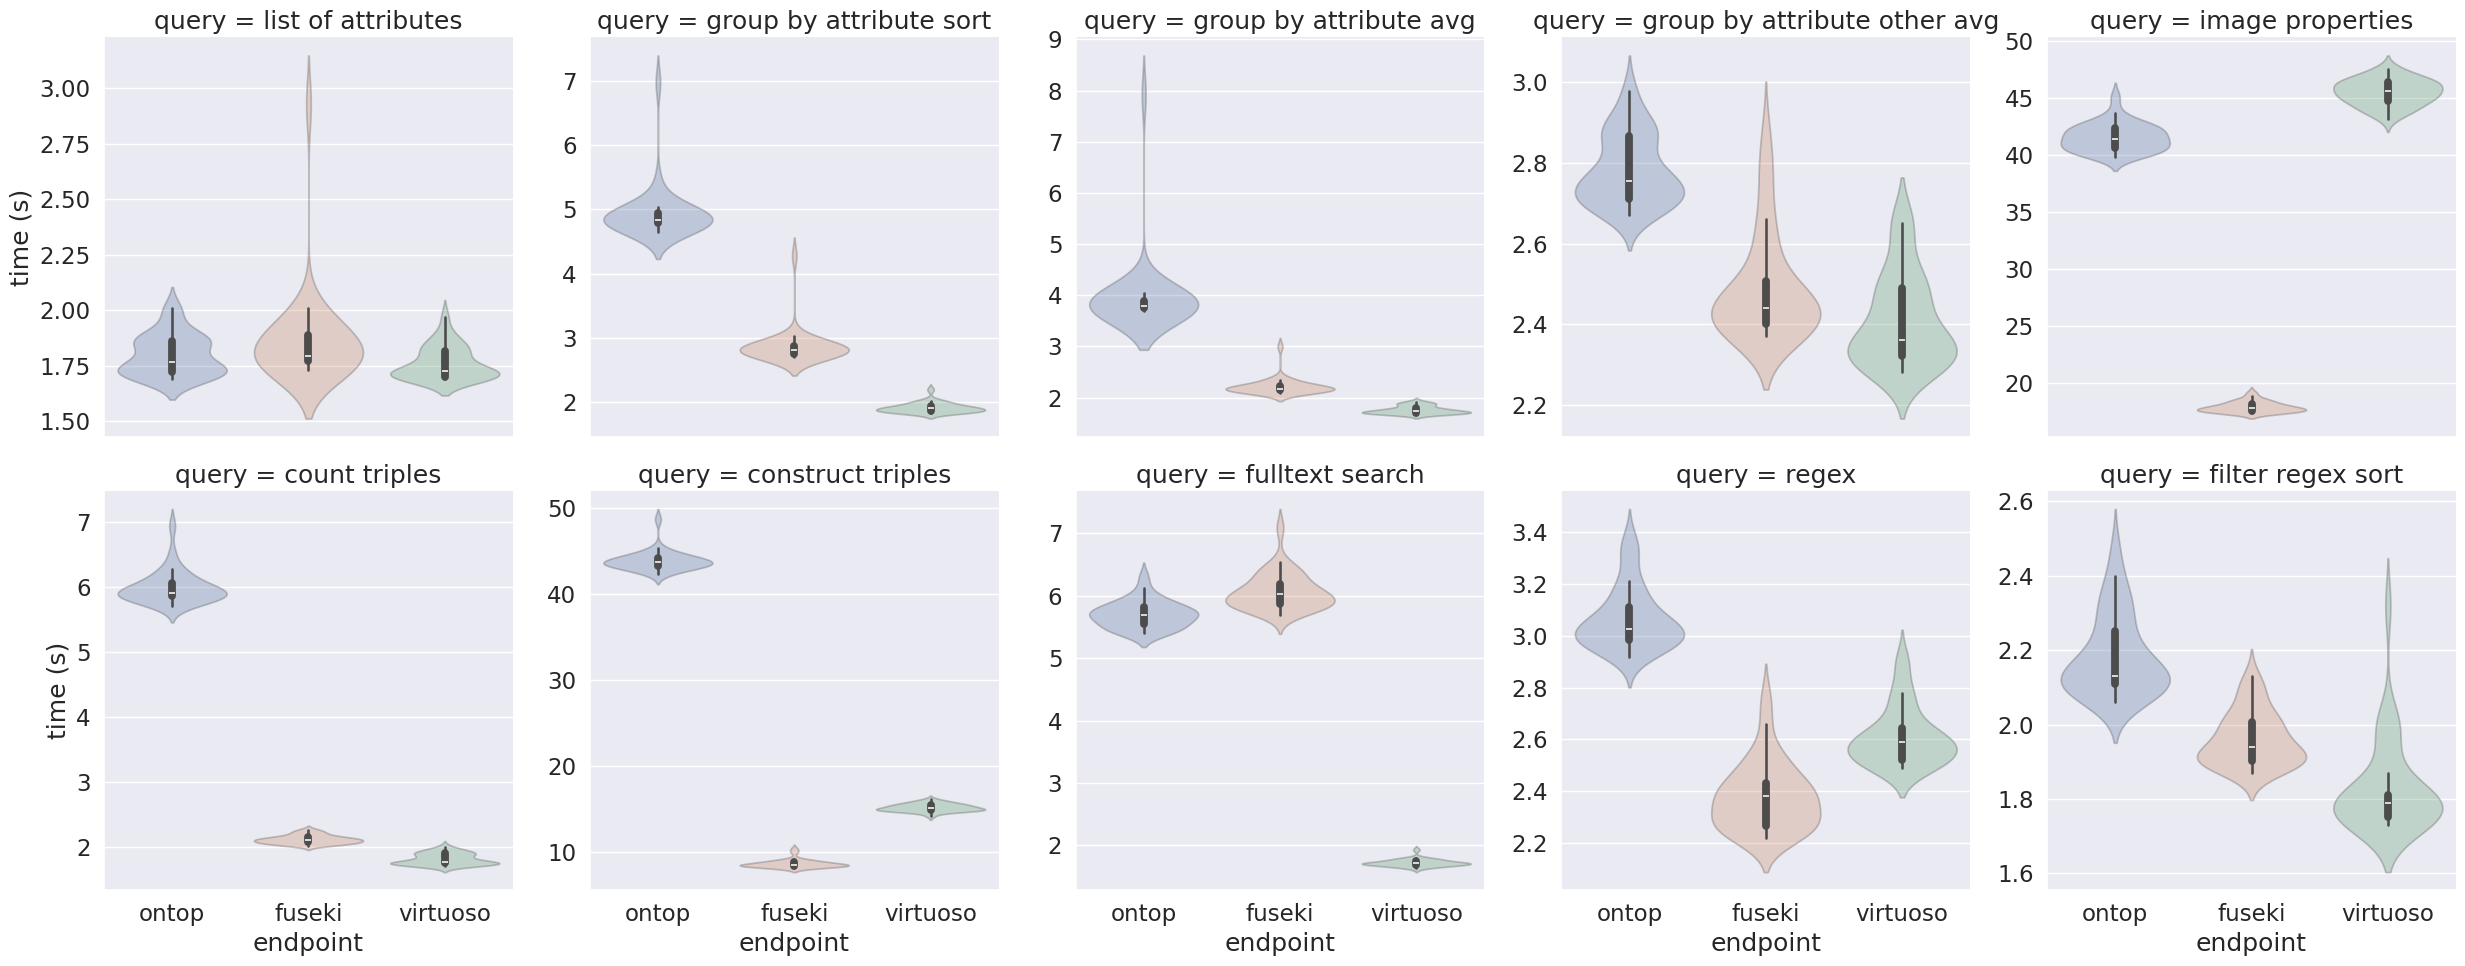

In [5]:
seaborn.set(font_scale=1.5)
seaborn.catplot(data=data[data.clock=='Wall (s)'],
                kind='violin',
                x='endpoint',
                y='time (s)',
                hue='endpoint',
                hue_order=['ontop',
                           'fuseki',
                           'virtuoso'],
                order=['ontop',
                       'fuseki',
                       'virtuoso'],
                col='query',
                alpha=0.3,
                sharey=False,
                legend='auto',
                col_wrap=5,
                col_order=['list of attributes',
                           'group by attribute sort',
                           'group by attribute avg',
                           'group by attribute other avg',
                           'image properties',
                           'count triples',
                           'construct triples',
                           'fulltext search',
                           'regex',
                           'filter regex sort',
                          ]
               ) 

mpl.pyplot.savefig("saved_runs/20241212T164000/facet_walltime.png")

## Compare to VPN runs

In [6]:
dataRun3 = get_data("saved_runs/20241210T143500/??-*.timings.collected.csv")

In [7]:
data['connection'] = "WWW"
dataRun3['connection'] = 'VPN'

In [9]:
data = pandas.concat([data, dataRun3])

In [14]:
seaborn.violinplot?

Signature:
seaborn.violinplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    inner='box',
    split=False,
    width=0.8,
    dodge='auto',
    gap=0,
    linewidth=None,
    linecolor='auto',
    cut=2,
    gridsize=100,
    bw_method='scott',
    bw_adjust=1,
    density_norm='area',
    common_norm=False,
    hue_norm=None,
    formatter=None,
    log_scale=None,
    native_scale=False,
    legend='auto',
    scale=<deprecated>,
    scale_hue=<deprecated>,
    bw=<deprecated>,
    inner_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Draw a patch representing a KDE and add observations or box plot statistics.

A violin plot plays a similar role as a box-and-whisker plot. It shows the
distribution of data points after grouping by one (or more) variables.
Unlike a box plot, each violin is drawn using a kernel density estimate
of the underlying 

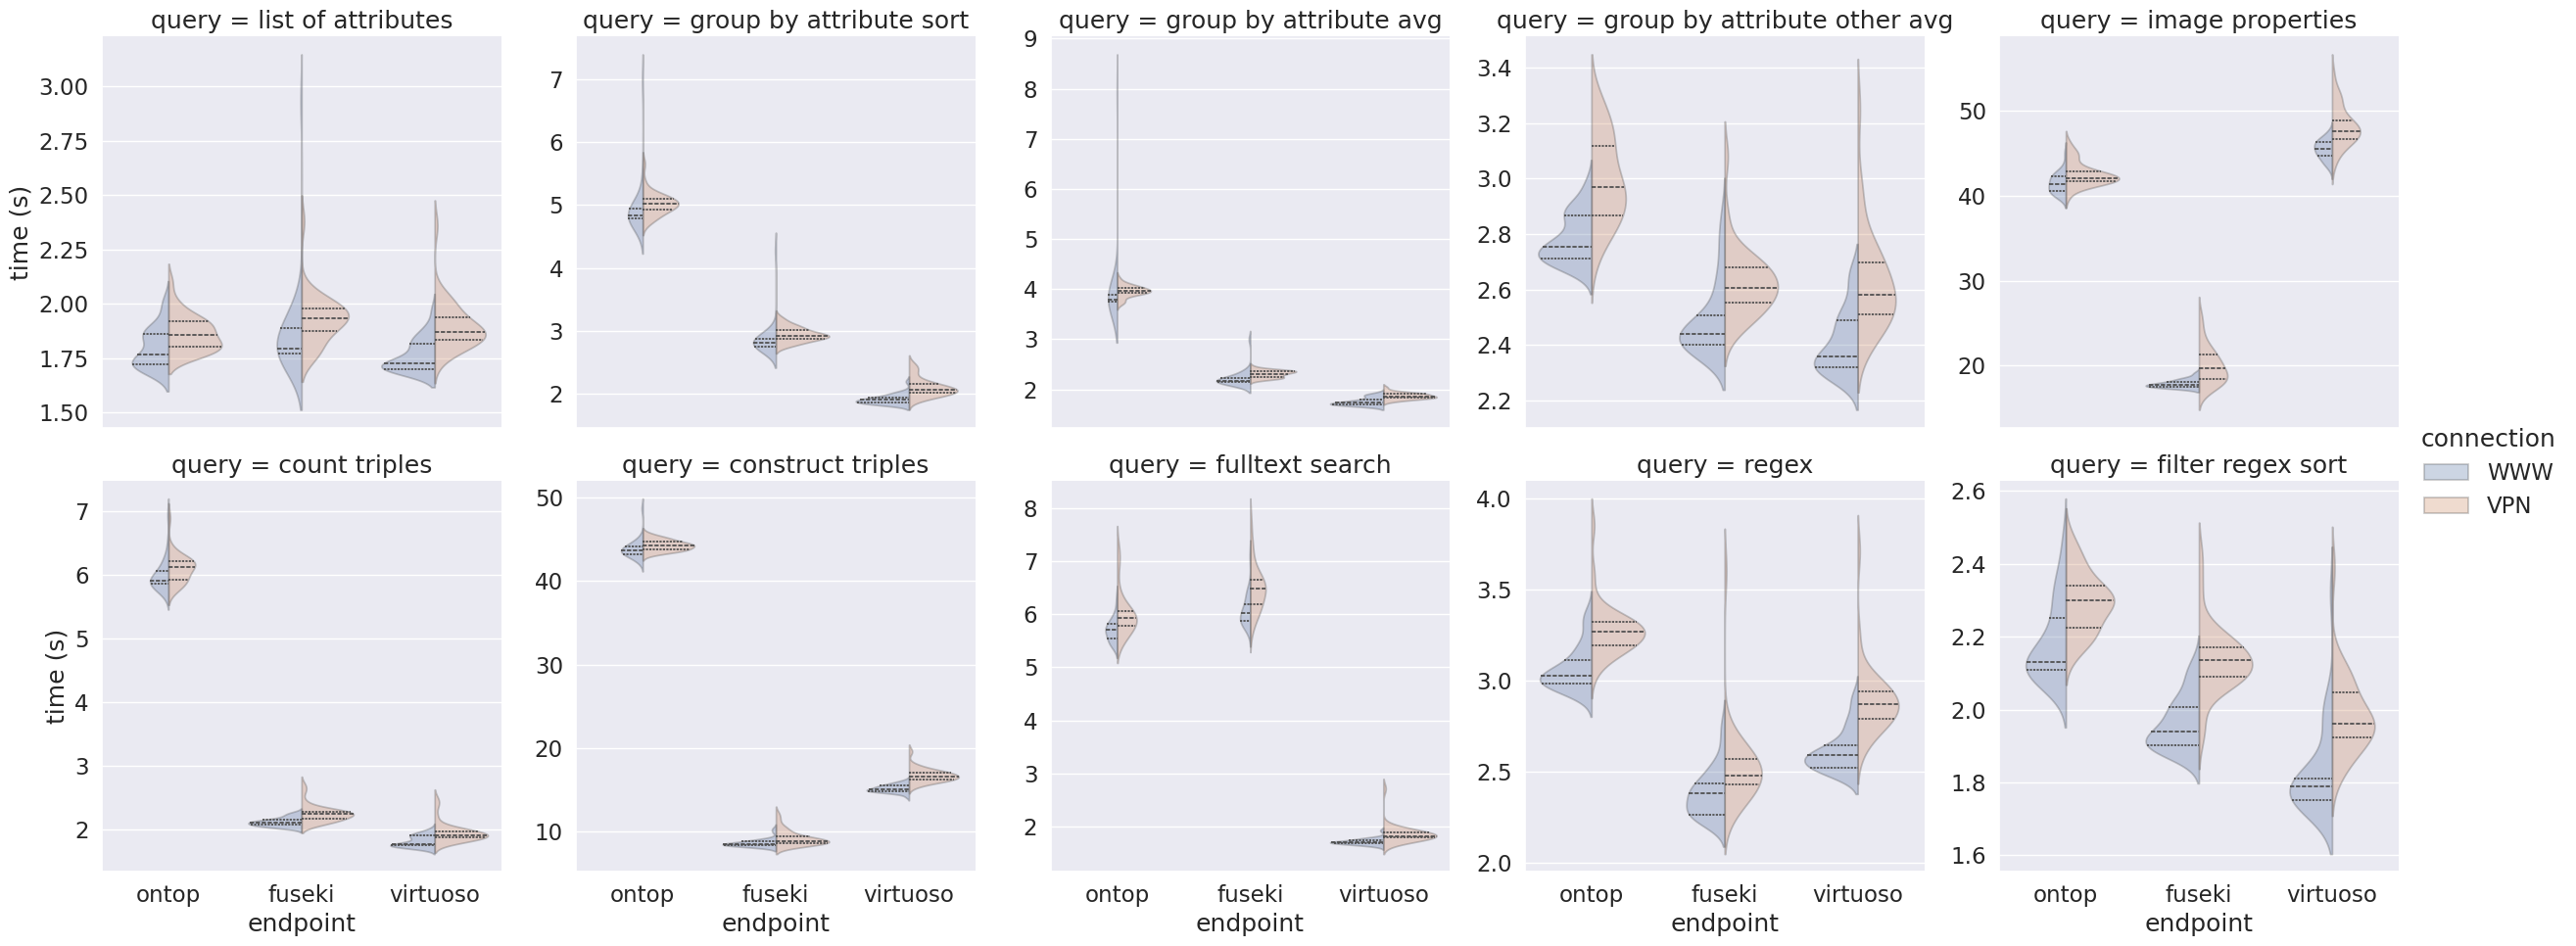

In [17]:
seaborn.set(font_scale=1.5)
seaborn.catplot(data=data[data.clock=='Wall (s)'],
                kind='violin',
                split=True,
                inner='quart',
                x='endpoint',
                y='time (s)',
                hue='connection',
                order=['ontop',
                       'fuseki',
                       'virtuoso'],
                col='query',
                alpha=0.3,
                sharey=False,
                legend='auto',
                col_wrap=5,
                col_order=['list of attributes',
                           'group by attribute sort',
                           'group by attribute avg',
                           'group by attribute other avg',
                           'image properties',
                           'count triples',
                           'construct triples',
                           'fulltext search',
                           'regex',
                           'filter regex sort',
                          ]
               ) 

mpl.pyplot.savefig("saved_runs/20241212T164000/facet_walltime_vpn-www.png")